In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('all stats premier league 22-23.csv')

In [5]:
data.head()

,Unnamed: 0,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err
0,0,Aaron Ramsdale,ENG,GK,24.0,38,38,3420.0,38.0,0.0,...,1,100.0,0,0,0,0,0,1,20,6
1,1,Gabriel Dos Santos,BRA,DF,24.0,38,38,3409.0,37.9,3.0,...,27,66.7,9,49,26,23,32,80,125,2
2,2,Bukayo Saka,ENG,FW,20.0,38,37,3181.0,35.3,14.0,...,44,45.5,24,38,0,38,14,77,19,0
3,3,Martin Ødegaard,NOR,MF,23.0,37,37,3127.0,34.7,15.0,...,47,29.8,33,20,5,15,6,42,12,1
4,4,Ben White,ENG,DF,24.0,38,36,3055.0,33.9,2.0,...,70,60.0,28,47,11,36,22,82,79,1


In [6]:
data.columns

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min',
       '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG',
       'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Matches', 'Club',
       'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att', 'Tkl%',
       'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'],
      dtype='object')

In [7]:
data.shape

(504, 42)

### Dropping GK position, Match Played less than 10, and Minutes Played less than 100 min

In [8]:
drop = data[(data['Pos'] == 'GK') | (data['MP'] < 10) | (data['Min'] < 100)].index
data.drop(drop, inplace=True)

In [9]:
data.shape

(404, 42)

### Selected Defensive Stats

In [10]:
defense = data[['Player', 'Club', 'Tkl','Blocks', 'Int', 'Clr']]

In [11]:
defense.head()

,Player,Club,Tkl,Blocks,Int,Clr
1,Gabriel Dos Santos,Arsenal,48,49,32,125
2,Bukayo Saka,Arsenal,63,38,14,19
3,Martin Ødegaard,Arsenal,36,20,6,12
4,Ben White,Arsenal,60,47,22,79
5,Granit Xhaka,Arsenal,34,28,15,45


In [12]:
defense.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tkl,404.0,30.985149,21.866497,1.0,14.0,26.0,45.0,147.0
Blocks,404.0,21.898515,14.190204,0.0,11.0,19.0,30.0,99.0
Int,404.0,16.292079,13.642869,0.0,5.0,13.0,24.0,63.0
Clr,404.0,34.638614,36.859577,0.0,8.0,22.0,48.0,215.0


In [13]:
defense.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 1 to 498
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  404 non-null    object
 1   Club    404 non-null    object
 2   Tkl     404 non-null    int64 
 3   Blocks  404 non-null    int64 
 4   Int     404 non-null    int64 
 5   Clr     404 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 22.1+ KB


#### Visualizing Defensive Stats

<Figure size 4000x3000 with 0 Axes>

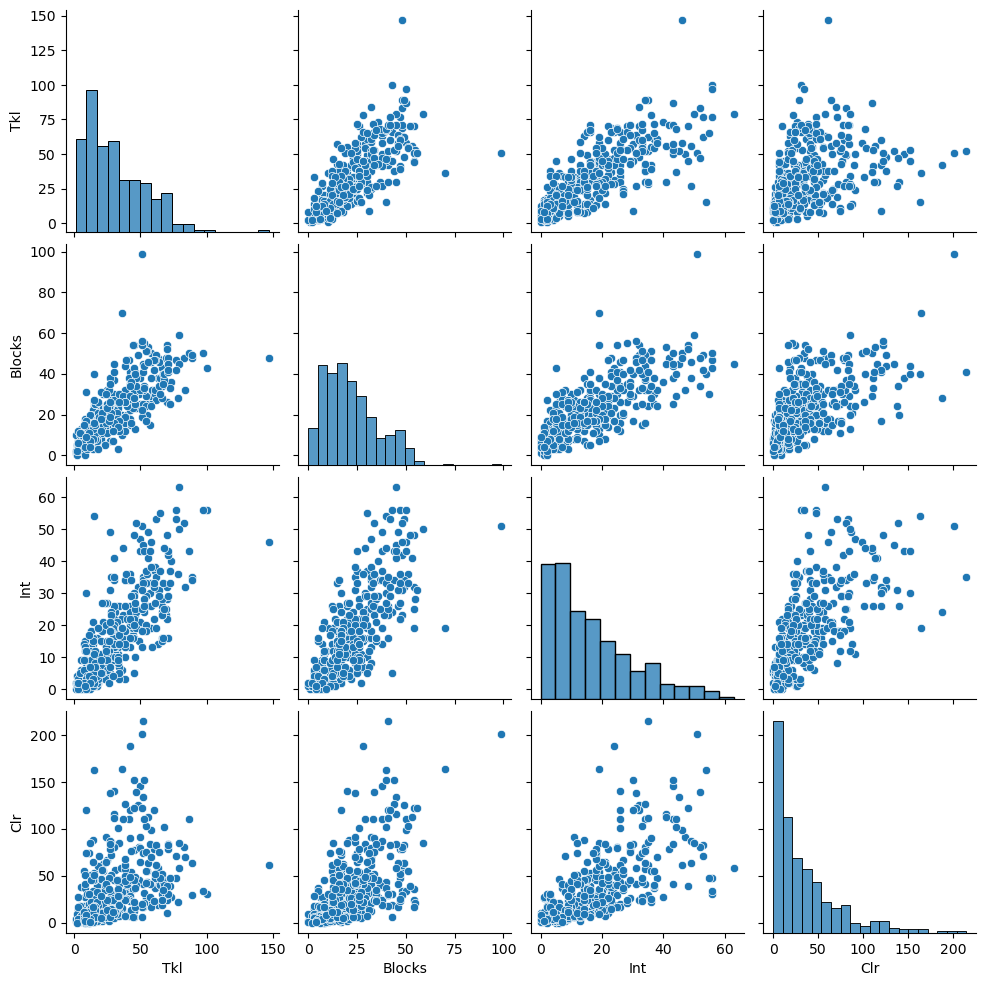

In [14]:
plt.figure(figsize=(40,30))
sns.pairplot(defense)

In [15]:
defense.columns

Index(['Player', 'Club', 'Tkl', 'Blocks', 'Int', 'Clr'], dtype='object')

### Preprocessing data with Min Max Scaler

In [16]:
def_preprocessing = defense.copy()

In [17]:
scaler = MinMaxScaler()
def_preprocessing[['Tkl','Blocks', 'Int', 'Clr']] = scaler.fit_transform(def_preprocessing[['Tkl','Blocks', 'Int', 'Clr']])

In [18]:
def_preprocessing.head()

,Player,Club,Tkl,Blocks,Int,Clr
1,Gabriel Dos Santos,Arsenal,0.321918,0.494949,0.507937,0.581395
2,Bukayo Saka,Arsenal,0.424658,0.383838,0.222222,0.088372
3,Martin Ødegaard,Arsenal,0.239726,0.202020,0.095238,0.055814
4,Ben White,Arsenal,0.404110,0.474747,0.349206,0.367442
5,Granit Xhaka,Arsenal,0.226027,0.282828,0.238095,0.209302


## Clustering by Offensive Stats

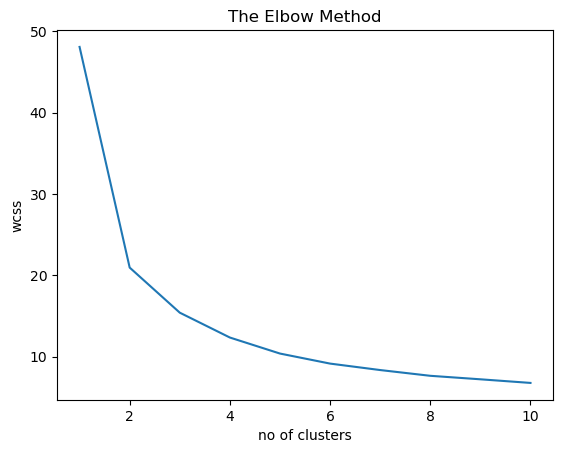

In [19]:
X_def = def_preprocessing[['Tkl','Blocks', 'Int', 'Clr']] #Clustering by Goals, assist, xg, xa, and progressive carries and passes
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_def)
    wcss.append(kmeans.inertia_)     
plt.plot(range(1,11), wcss,)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

### From elbow method plot, best number of cluster is n=3

In [20]:
#Clustering data with K-Means Algorithm
model = KMeans(n_clusters=3 , init='k-means++', random_state=0)
y_kmeans= model.fit_predict(X_def)
labels = model.labels_
defense["Tier"] = labels
defense.head()

,Player,Club,Tkl,Blocks,Int,Clr,Tier
1,Gabriel Dos Santos,Arsenal,48,49,32,125,2
2,Bukayo Saka,Arsenal,63,38,14,19,0
3,Martin Ødegaard,Arsenal,36,20,6,12,1
4,Ben White,Arsenal,60,47,22,79,2
5,Granit Xhaka,Arsenal,34,28,15,45,0


<Axes: xlabel='Int', ylabel='Blocks'>

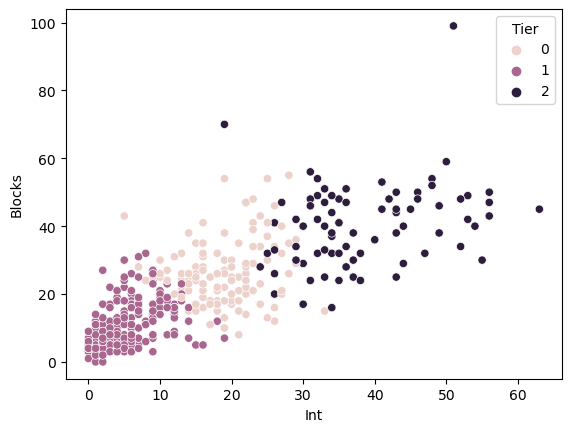

In [21]:
sns.scatterplot(data=defense, x='Int', y='Blocks', hue='Tier')

In [22]:
defense.loc[defense['Tier'] == 2, 'Category'] = 'A Tier'
defense.loc[defense['Tier'] == 1, 'Category'] = 'C Tier'
defense.loc[defense['Tier'] == 0, 'Category'] = 'B Tier'
defense.head()

,Player,Club,Tkl,Blocks,Int,Clr,Tier,Category
1,Gabriel Dos Santos,Arsenal,48,49,32,125,2,A Tier
2,Bukayo Saka,Arsenal,63,38,14,19,0,B Tier
3,Martin Ødegaard,Arsenal,36,20,6,12,1,C Tier
4,Ben White,Arsenal,60,47,22,79,2,A Tier
5,Granit Xhaka,Arsenal,34,28,15,45,0,B Tier


In [23]:
defense = defense.drop('Tier', axis=1)

#### Visualizing K-Means Algorithm

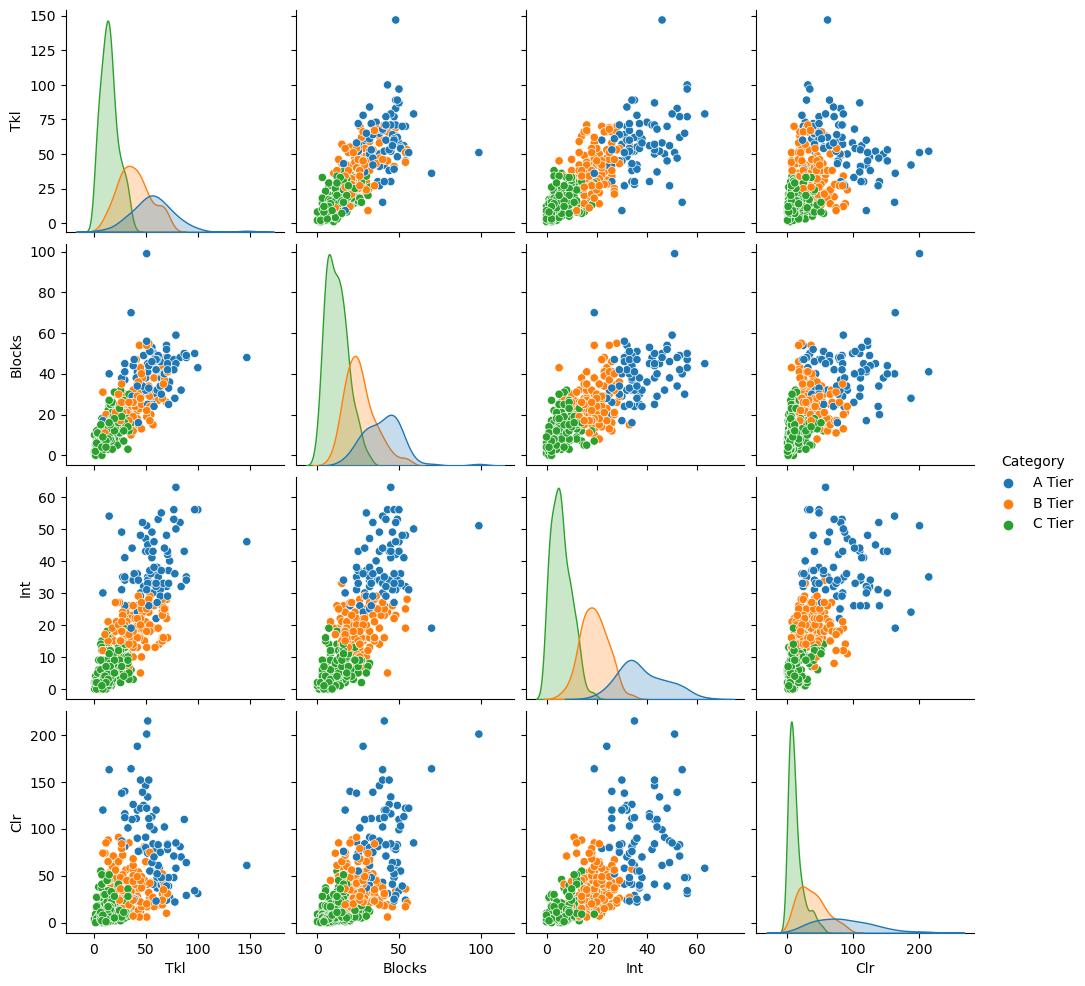

In [24]:
sns.pairplot(defense, hue='Category')

#### Data  A Tier players

In [25]:
data_a_tier = defense[defense['Category'] == 'A Tier']
data_a_tier

,Player,Club,Tkl,Blocks,Int,Clr,Category
1,Gabriel Dos Santos,Arsenal,48,49,32,125,A Tier
4,Ben White,Arsenal,60,47,22,79,A Tier
24,Ezri Konsa,Aston Villa,42,41,26,120,A Tier
27,Tyrone Mings,Aston Villa,15,40,54,163,A Tier
28,Douglas Luiz,Aston Villa,73,36,40,27,A Tier
...,...,...,...,...,...,...,...
460,Vladimír Coufal,West Ham United,58,24,38,70,A Tier
461,Kurt Zouma,West Ham United,9,17,30,120,A Tier
475,Max Kilman,Wolverhampton Wanderers,36,70,19,164,A Tier
477,Rúben Neves,Wolverhampton Wanderers,79,59,50,85,A Tier


#### Data B Tier players

In [26]:
data_b_tier = defense[defense['Category'] == 'B Tier']
data_b_tier

,Player,Club,Tkl,Blocks,Int,Clr,Category
2,Bukayo Saka,Arsenal,63,38,14,19,B Tier
5,Granit Xhaka,Arsenal,34,28,15,45,B Tier
7,Thomas Partey,Arsenal,70,26,28,41,B Tier
8,William Saliba,Arsenal,34,13,19,85,B Tier
9,Oleksandr Zinchenko,Arsenal,40,20,22,38,B Tier
...,...,...,...,...,...,...,...
480,João Moutinho,Wolverhampton Wanderers,51,22,18,20,B Tier
482,Nathan Collins,Wolverhampton Wanderers,27,35,21,84,B Tier
483,Craig Dawson,Wolverhampton Wanderers,9,31,12,74,B Tier
484,Mario Lemina,Wolverhampton Wanderers,38,26,14,24,B Tier


#### Data C Tier Players

In [27]:
data_c_tier = defense[defense['Category'] == 'C Tier']
data_c_tier

,Player,Club,Tkl,Blocks,Int,Clr,Category
3,Martin Ødegaard,Arsenal,36,20,6,12,C Tier
6,Martinelli,Arsenal,31,24,9,14,C Tier
11,Leandro Trossard,Arsenal,12,18,6,3,C Tier
12,Eddie Nketiah,Arsenal,13,7,1,7,C Tier
13,Jorginho,Arsenal,18,7,9,8,C Tier
...,...,...,...,...,...,...,...
494,Pablo Sarabia,Wolverhampton Wanderers,12,7,2,4,C Tier
495,Raúl Jiménez,Wolverhampton Wanderers,9,9,0,8,C Tier
496,Gonçalo Guedes,Wolverhampton Wanderers,8,4,1,2,C Tier
497,João Gomes,Wolverhampton Wanderers,29,12,4,11,C Tier


In [29]:
defense[defense['Club'] == 'Arsenal ']

,Player,Club,Tkl,Blocks,Int,Clr,Category
1,Gabriel Dos Santos,Arsenal,48,49,32,125,A Tier
2,Bukayo Saka,Arsenal,63,38,14,19,B Tier
3,Martin Ødegaard,Arsenal,36,20,6,12,C Tier
4,Ben White,Arsenal,60,47,22,79,A Tier
5,Granit Xhaka,Arsenal,34,28,15,45,B Tier
6,Martinelli,Arsenal,31,24,9,14,C Tier
7,Thomas Partey,Arsenal,70,26,28,41,B Tier
8,William Saliba,Arsenal,34,13,19,85,B Tier
9,Oleksandr Zinchenko,Arsenal,40,20,22,38,B Tier
10,Gabriel Jesus,Arsenal,33,27,11,15,B Tier
